In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table('../附件/附件4：门店交易训练数据.txt', header=None)
columns = ['carId', 'pushDate', 'pushPrice', 'updatePriceTimeJson','pullDate', 'withdrawDate']
data.columns = columns
data

,carId,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate
0,68603,2021-03-11,3.9800,{},2021-03-11,2021-03-11
1,12312,2021-05-14,4.5000,{},2021-06-14,2021-06-14
2,57655,2021-03-13,23.9000,"{""2021-04-05"": ""23""}",2021-04-08,2021-04-08
3,45688,2020-09-01,20.5798,{},2020-09-04,2020-09-04
4,52081,2021-04-29,12.2800,"{""2021-05-20"": ""11.9""}",2021-06-21,2021-06-21
...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{},2021-09-11,NaN
9996,54312,2021-03-22,12.3000,{},2021-04-16,NaN
9997,45597,2021-01-09,15.3800,{},2021-01-27,NaN
9998,38629,2021-06-07,36.8800,"{""2021-06-12"": ""36.6""}",2021-06-22,NaN


In [3]:
json = data['updatePriceTimeJson'].tolist()
json = [eval(i) for i in json]
data.drop(['updatePriceTimeJson'], axis=1, inplace=True)
json

[{},
 {},
 {'2021-04-05': '23'},
 {},
 {'2021-05-20': '11.9'},
 {'2020-12-29': '17.68', '2020-12-30': '17.8799', '2021-01-15': '16.8799'},
 {},
 {},
 {},
 {},
 {'2020-11-05': '18.98', '2020-11-09': '18.58'},
 {},
 {},
 {'2020-03-01': '8.6'},
 {},
 {'2020-07-05': '11.3', '2020-07-10': '11'},
 {},
 {},
 {'2021-04-16': '3.98'},
 {},
 {},
 {},
 {},
 {'2021-01-13': '39.3'},
 {'2021-04-20': '6.55'},
 {},
 {},
 {'2020-06-14': '28', '2020-06-22': '27.8'},
 {},
 {'2021-05-08': '1.24'},
 {},
 {},
 {'2020-07-05': '2.98'},
 {'2020-04-25': '5.18'},
 {},
 {'2021-07-11': '1.35'},
 {'2020-08-13': '18.8799'},
 {'2020-11-13': '71.6'},
 {},
 {},
 {'2021-06-29': '4.88'},
 {},
 {},
 {},
 {},
 {},
 {'2020-09-16': '6.99', '2020-10-09': '6.88', '2020-10-15': '6.8'},
 {},
 {'2021-05-10': '3.95', '2021-05-22': '2.94'},
 {},
 {},
 {},
 {},
 {},
 {'2021-05-17': '6.98', '2021-05-22': '6.87'},
 {'2021-06-23': '16.4999'},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'2020-11-11': '4.18', '2020-11-16': '4.1'},
 {},
 {},

In [4]:
data_importance = pd.read_csv('./all.csv')
impute = pd.read_csv('data1.csv')
data_importance['carId'].iloc[:29966] = impute['carId']
data_importance.drop('Unnamed: 0', axis=1, inplace=True)
data_importance

,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,seatings,...,unknown8,unknown9,unknown10,unknown12,unknown13,price,unknown11_1,unknown11_2,unknown11_3,carId
0,0.509589,1,1,1,4.01,1,1,1.0,0,5,...,5.0,2.0,5.964053,3.824658,1,4.24,4.220,1.740,1.625,1.0
1,0.517808,2,2,2,8.60,1,2,1.0,0,5,...,4.0,3.0,19.289185,4.816438,2,7.38,4.630,1.775,1.480,2.0
2,0.534247,5,5,5,15.56,1,2,3.0,0,5,...,4.0,3.0,5.964053,14.254795,2,1.00,4.515,1.725,1.445,5.0
3,0.506849,6,6,6,6.04,1,3,1.0,3,5,...,5.0,2.0,5.964053,4.912329,2,4.38,4.500,1.834,1.707,6.0
4,0.504110,7,7,7,5.70,4,1,2.0,2,5,...,5.0,2.0,5.964053,9.252055,1,5.90,4.315,1.783,1.606,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34960,0.175342,12,275,1023,8.53,1,1,1.0,1,7,...,5.0,2.0,1.000000,4.739726,1,NaN,4.845,1.805,1.695,55510.0
34961,0.356164,17,480,1400,11.11,1,19,2.0,0,5,...,4.0,3.0,3.000000,6.980822,1,NaN,4.740,1.770,1.480,1768.0
34962,0.326027,7,166,1056,11.02,2,1,2.0,1,5,...,4.0,3.0,0.000000,10.846575,1,NaN,4.850,1.795,1.475,20723.0
34963,0.172603,25,235,371,6.21,4,5,1.0,0,5,...,5.0,2.0,0.000000,5.580822,2,NaN,4.100,1.740,1.635,15625.0


In [5]:
data_importance = data_importance[['serial', 'model', 'newPrice', 'time',  'mileage', 'gearbox', 'unknown3', 'tradeTime', 'cityId',
                                   'country', 'carId']]
data_importance

,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,carId
0,1,1,6.88,4.0,4.01,1.0,1.0,0.509589,1,779413.0,1.0
1,2,2,11.98,4.0,8.60,2.0,2.0,0.517808,2,779415.0,2.0
2,5,5,12.78,13.0,15.56,4.0,5.0,0.534247,2,779416.0,5.0
3,6,6,9.49,5.0,6.04,2.0,6.0,0.506849,3,779413.0,6.0
4,7,7,18.08,9.0,5.70,5.0,7.0,0.504110,1,779415.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
34960,275,1023,26.68,4.0,8.53,11.0,204.0,0.175342,1,779415.0,55510.0
34961,480,1400,20.98,7.0,11.11,10.0,19.0,0.356164,19,779413.0,1768.0
34962,166,1056,22.48,13.0,11.02,5.0,168.0,0.326027,1,779415.0,20723.0
34963,235,371,5.99,5.0,6.21,6.0,182.0,0.172603,5,779413.0,15625.0


In [6]:
data_ = pd.merge(left=data, right=data_importance, how='left', on=['carId'])
data_

,carId,pushDate,pushPrice,pullDate,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country
0,68603,2021-03-11,3.9800,2021-03-11,2021-03-11,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0
1,12312,2021-05-14,4.5000,2021-06-14,2021-06-14,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0
2,57655,2021-03-13,23.9000,2021-04-08,2021-04-08,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0
3,45688,2020-09-01,20.5798,2020-09-04,2020-09-04,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0
4,52081,2021-04-29,12.2800,2021-06-21,2021-06-21,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,2021-09-11,NaN,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0
9996,54312,2021-03-22,12.3000,2021-04-16,NaN,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0
9997,45597,2021-01-09,15.3800,2021-01-27,NaN,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0
9998,38629,2021-06-07,36.8800,2021-06-22,NaN,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0


In [7]:
data_['pushDate'] = pd.to_datetime(data_['pullDate']) - pd.to_datetime(data_['pushDate'])
data_['pushDate'] = data_['pushDate'].astype(str)
data_['pushDate'] = data_['pushDate'].str.split()
data_['pushDate'] = [np.float(i[0]) for i in data_['pushDate'].tolist()]
data_

,carId,pushDate,pushPrice,pullDate,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country
0,68603,0.0,3.9800,2021-03-11,2021-03-11,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0
1,12312,31.0,4.5000,2021-06-14,2021-06-14,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0
2,57655,26.0,23.9000,2021-04-08,2021-04-08,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0
3,45688,3.0,20.5798,2020-09-04,2020-09-04,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0
4,52081,53.0,12.2800,2021-06-21,2021-06-21,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,2021-09-11,NaN,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0
9996,54312,25.0,12.3000,2021-04-16,NaN,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0
9997,45597,18.0,15.3800,2021-01-27,NaN,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0
9998,38629,15.0,36.8800,2021-06-22,NaN,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0


In [8]:
length = []
for i in json:
    length.append(len(i))

end_time = []

keys = [(list(lst.keys())) for lst in json]
for key in keys:
    try:
        end_time.append(key[-1])
    except IndexError:
        end_time.append(None)

end_price = []
values = [(list(lst.values())) for lst in json]
for value in values:
    try:
        end_price.append(value[-1])
    except IndexError:
        end_price.append(None)

In [9]:
data_['endTime'] = end_time
data_['endPrice'] = end_price
data_['downCount'] = length
data_

,carId,pushDate,pushPrice,pullDate,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount
0,68603,0.0,3.9800,2021-03-11,2021-03-11,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,None,None,0
1,12312,31.0,4.5000,2021-06-14,2021-06-14,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,None,None,0
2,57655,26.0,23.9000,2021-04-08,2021-04-08,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,2021-04-05,23,1
3,45688,3.0,20.5798,2020-09-04,2020-09-04,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,None,None,0
4,52081,53.0,12.2800,2021-06-21,2021-06-21,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,2021-05-20,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,2021-09-11,NaN,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,None,None,0
9996,54312,25.0,12.3000,2021-04-16,NaN,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,None,None,0
9997,45597,18.0,15.3800,2021-01-27,NaN,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,None,None,0
9998,38629,15.0,36.8800,2021-06-22,NaN,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,2021-06-12,36.6,1


In [10]:
na = data_[['pushPrice', 'endPrice']]
na = na.T.fillna(method='ffill').T

data_['endPrice'] = na['endPrice']

na = data_[['pullDate', 'endTime']]
na = na.T

na = na.fillna(method='ffill').T
data_['endTime'] = na['endTime']

data_['withdrawDate'] = np.where(data_['withdrawDate'].isna(), 0, 1)
data_

,carId,pushDate,pushPrice,pullDate,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount
0,68603,0.0,3.9800,2021-03-11,1,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,2021-03-11,3.98,0
1,12312,31.0,4.5000,2021-06-14,1,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,2021-06-14,4.5,0
2,57655,26.0,23.9000,2021-04-08,1,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,2021-04-05,23,1
3,45688,3.0,20.5798,2020-09-04,1,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,2020-09-04,20.5798,0
4,52081,53.0,12.2800,2021-06-21,1,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,2021-05-20,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,2021-09-11,0,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,2021-09-11,22.88,0
9996,54312,25.0,12.3000,2021-04-16,0,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,2021-04-16,12.3,0
9997,45597,18.0,15.3800,2021-01-27,0,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,2021-01-27,15.38,0
9998,38629,15.0,36.8800,2021-06-22,0,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,2021-06-12,36.6,1


In [11]:
# data_['pushDate'] = (pd.to_datetime(data_['pullDate']) - pd.to_datetime(data_['pushDate'])).astype(str)
data_['endTime'] = (pd.to_datetime(data_['pullDate']) - pd.to_datetime(data_['endTime'])).astype(str)
data_['endPrice'] = data_['endPrice'].astype(float)
data_['price'] = (data_['pushPrice'] - data_['endPrice']) / data_['pushPrice']

# data_['pushDate'] = [np.float(col.split()[0]) for col in data_['pushDate']]
data_['endTime'] = [np.float(col.split()[0]) for col in data_['endTime']]

data_.drop('pullDate', axis=1, inplace=True)

data_

,carId,pushDate,pushPrice,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,3.9800,1,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,0.0,3.9800,0,0.000000
1,12312,31.0,4.5000,1,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,0.0,4.5000,0,0.000000
2,57655,26.0,23.9000,1,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,3.0,23.0000,1,0.037657
3,45688,3.0,20.5798,1,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,0.0,20.5798,0,0.000000
4,52081,53.0,12.2800,1,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,0,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,0.0,22.8800,0,0.000000
9996,54312,25.0,12.3000,0,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,0.0,12.3000,0,0.000000
9997,45597,18.0,15.3800,0,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,0.0,15.3800,0,0.000000
9998,38629,15.0,36.8800,0,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,10.0,36.6000,1,0.007592


In [12]:
data_.dropna(axis=0, inplace=True)
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carId         9985 non-null   int64  
 1   pushDate      9985 non-null   float64
 2   pushPrice     9985 non-null   float64
 3   withdrawDate  9985 non-null   int32  
 4   serial        9985 non-null   float64
 5   model         9985 non-null   float64
 6   newPrice      9985 non-null   float64
 7   time          9985 non-null   float64
 8   mileage       9985 non-null   float64
 9   gearbox       9985 non-null   float64
 10  unknown3      9985 non-null   float64
 11  tradeTime     9985 non-null   float64
 12  cityId        9985 non-null   float64
 13  country       9985 non-null   float64
 14  endTime       9985 non-null   float64
 15  endPrice      9985 non-null   float64
 16  downCount     9985 non-null   int64  
 17  price         9985 non-null   float64
dtypes: float64(15), int32(1), in

array([[<AxesSubplot:title={'center':'carId'}>,
        <AxesSubplot:title={'center':'pushDate'}>,
        <AxesSubplot:title={'center':'pushPrice'}>,
        <AxesSubplot:title={'center':'withdrawDate'}>],
       [<AxesSubplot:title={'center':'serial'}>,
        <AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'newPrice'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'gearbox'}>,
        <AxesSubplot:title={'center':'unknown3'}>,
        <AxesSubplot:title={'center':'tradeTime'}>],
       [<AxesSubplot:title={'center':'cityId'}>,
        <AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'endTime'}>,
        <AxesSubplot:title={'center':'endPrice'}>],
       [<AxesSubplot:title={'center':'downCount'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

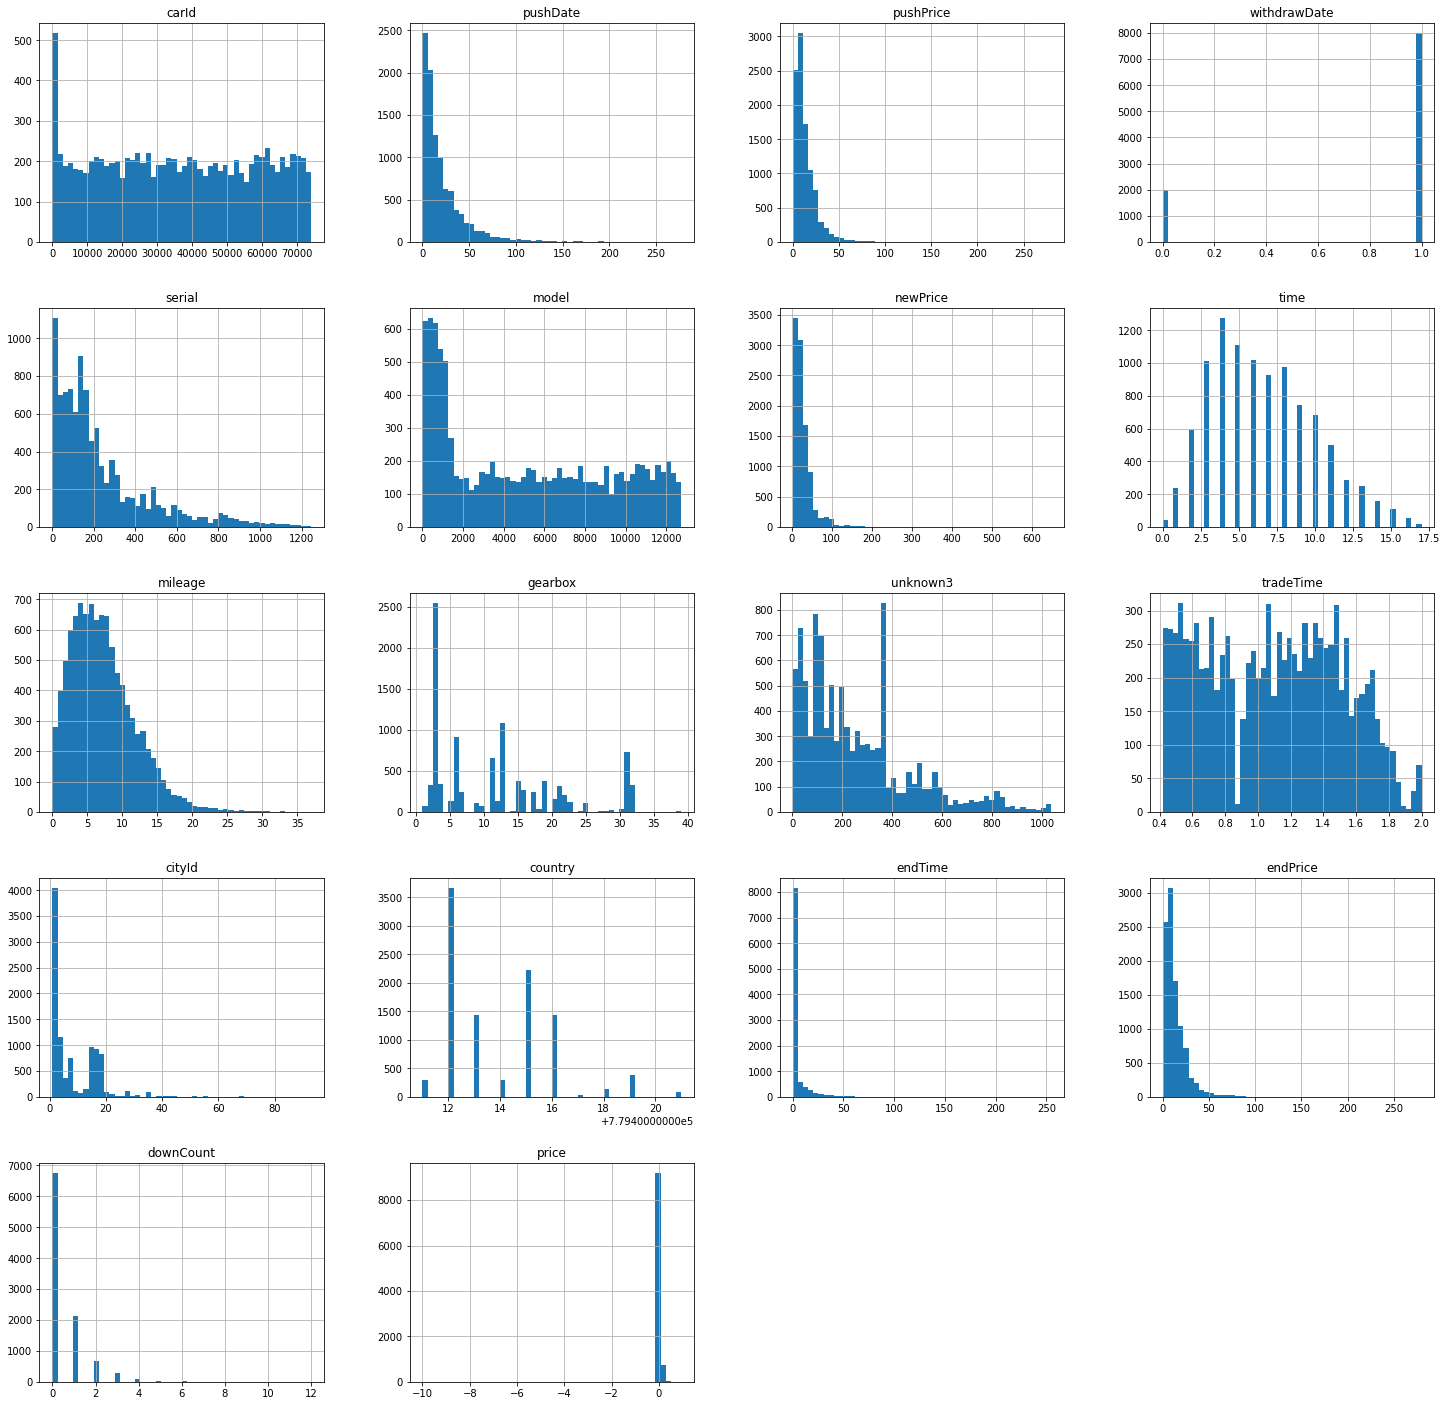

In [13]:
data_.hist(bins=50, figsize=(25, 25))

In [14]:
classif = ['serial', 'model', 'gearbox','cityId', 'country']
regression = ['newPrice', 'unknown3', 'tradeTime', 'mileage', 'pushDate', 'pushPrice', 'endTime', 'endPrice']

In [15]:
pd.Series(regression).unique()

array(['newPrice', 'unknown3', 'tradeTime', 'mileage', 'pushDate',
       'pushPrice', 'endTime', 'endPrice'], dtype=object)

In [16]:
corr = data_[regression].corr()
corr

,newPrice,unknown3,tradeTime,mileage,pushDate,pushPrice,endTime,endPrice
newPrice,1.000000,0.259947,0.020211,0.154528,0.023239,0.777846,0.007304,0.780581
unknown3,0.259947,1.000000,0.015997,0.080312,0.012285,0.169724,-0.001835,0.170606
tradeTime,0.020211,0.015997,1.000000,-0.047438,0.111298,0.035546,0.039896,0.037571
mileage,0.154528,0.080312,-0.047438,1.000000,-0.035044,-0.181235,-0.004448,-0.183583
pushDate,0.023239,0.012285,0.111298,-0.035044,1.000000,0.081622,0.527576,0.075249
pushPrice,0.777846,0.169724,0.035546,-0.181235,0.081622,1.000000,0.032981,0.995062
endTime,0.007304,-0.001835,0.039896,-0.004448,0.527576,0.032981,1.000000,0.023550
endPrice,0.780581,0.170606,0.037571,-0.183583,0.075249,0.995062,0.023550,1.000000


In [17]:
data_

,carId,pushDate,pushPrice,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,3.9800,1,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,0.0,3.9800,0,0.000000
1,12312,31.0,4.5000,1,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,0.0,4.5000,0,0.000000
2,57655,26.0,23.9000,1,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,3.0,23.0000,1,0.037657
3,45688,3.0,20.5798,1,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,0.0,20.5798,0,0.000000
4,52081,53.0,12.2800,1,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,0,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,0.0,22.8800,0,0.000000
9996,54312,25.0,12.3000,0,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,0.0,12.3000,0,0.000000
9997,45597,18.0,15.3800,0,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,0.0,15.3800,0,0.000000
9998,38629,15.0,36.8800,0,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,10.0,36.6000,1,0.007592


In [18]:
data_

,carId,pushDate,pushPrice,withdrawDate,serial,model,newPrice,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,3.9800,1,314.0,11903.0,15.89,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,0.0,3.9800,0,0.000000
1,12312,31.0,4.5000,1,797.0,3174.0,9.28,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,0.0,4.5000,0,0.000000
2,57655,26.0,23.9000,1,196.0,10320.0,34.00,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,3.0,23.0000,1,0.037657
3,45688,3.0,20.5798,1,845.0,8504.0,82.13,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,0.0,20.5798,0,0.000000
4,52081,53.0,12.2800,1,187.0,9521.0,22.98,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,22.8800,0,502.0,2785.0,24.48,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,0.0,22.8800,0,0.000000
9996,54312,25.0,12.3000,0,187.0,9852.0,19.98,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,0.0,12.3000,0,0.000000
9997,45597,18.0,15.3800,0,11.0,1051.0,22.29,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,0.0,15.3800,0,0.000000
9998,38629,15.0,36.8800,0,181.0,819.0,45.99,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,10.0,36.6000,1,0.007592


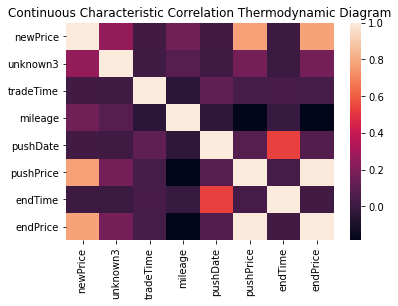

In [19]:
sns.heatmap(corr)
plt.title('Continuous Characteristic Correlation Thermodynamic Diagram')
plt.savefig('./solve2/corr1.png', dpi=1600, bbox_inches = 'tight')

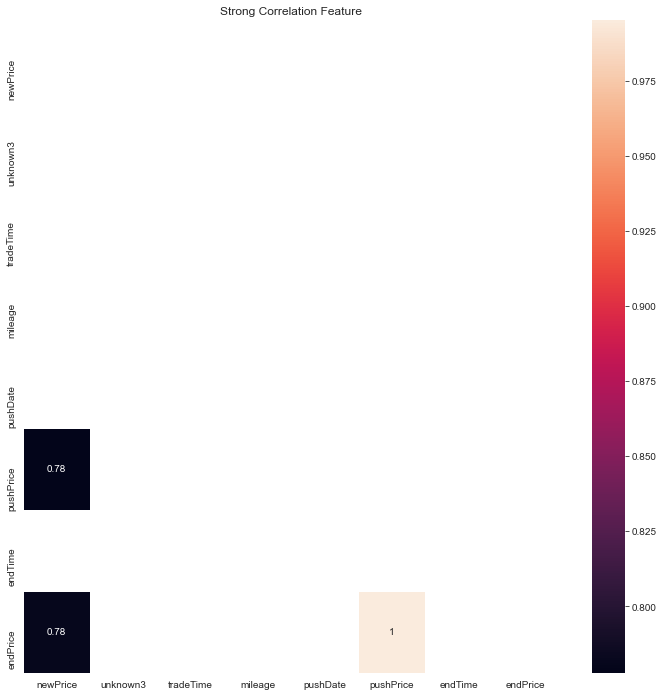

In [20]:
plt.figure(figsize=(12, 12))
mask = np.zeros_like(corr[corr>=.7],dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
# 显示强相关模式的相关系数热力值，低于参考值的部分显示为白色，从而获取强相关项
# 得到互信息值的热力图
sns.heatmap(corr[corr>=.7],annot=True,mask=mask,cbar=True, linewidths=.5)
plt.title('Strong Correlation Feature')
plt.savefig('./solve2/corr2.png', dpi=1600, bbox_inches = 'tight')

In [21]:
drop = []

for index in corr.index:
    for col in corr.columns:
        if corr.loc[index, col] > 0.7:
            if index != col and (index, col) not in drop:
                drop.append((index, col))
drop = np.unique([col for col in drop])
drop

array(['endPrice', 'newPrice', 'pushPrice'], dtype='<U9')

In [22]:
data_.drop(['newPrice', 'pushPrice'], axis=1, inplace=True)

In [23]:
# data_.drop(['oilType', 'unknown0', 'unknown2'], axis=1, inplace=True)
temp = data_.copy()
data_

,carId,pushDate,withdrawDate,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,1,314.0,11903.0,7.0,11.80,3.0,118.0,0.808219,1.0,779414.0,0.0,3.9800,0,0.000000
1,12312,31.0,1,797.0,3174.0,4.0,3.87,23.0,632.0,0.632877,2.0,779413.0,0.0,4.5000,0,0.000000
2,57655,26.0,1,196.0,10320.0,2.0,1.64,7.0,981.0,0.739726,3.0,779412.0,3.0,23.0000,1,0.037657
3,45688,3.0,1,845.0,8504.0,13.0,10.45,31.0,1037.0,1.331507,1.0,779412.0,0.0,20.5798,0,0.000000
4,52081,53.0,1,187.0,9521.0,8.0,5.66,11.0,554.0,0.616438,19.0,779415.0,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,0,502.0,2785.0,2.0,2.31,13.0,160.0,0.419178,8.0,779415.0,0.0,22.8800,0,0.000000
9996,54312,25.0,0,187.0,9852.0,6.0,6.50,11.0,554.0,0.778082,17.0,779415.0,0.0,12.3000,0,0.000000
9997,45597,18.0,0,11.0,1051.0,4.0,5.17,31.0,356.0,0.975342,7.0,779412.0,0.0,15.3800,0,0.000000
9998,38629,15.0,0,181.0,819.0,4.0,2.29,21.0,148.0,0.553425,1.0,779416.0,10.0,36.6000,1,0.007592


In [24]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor

train = data_.drop('carId', axis=1)
train = train[train['withdrawDate'] == 1]
train = train[train['pushDate'] != 0]
train_col = [col for col in train.columns if col not in ['withdrawDate', 'pushDate']]

stacking = StackingRegressor(
    estimators=[
        ('gbdt', GradientBoostingRegressor()),
        ('rf', RandomForestRegressor()),
        ('gbm', LGBMRegressor())
    ],
    final_estimator=XGBRegressor()
)

models = [
    XGBRegressor(tree_method='gpu_hist', gpu_id=0),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(n_estimators=100, task_type='GPU'),
    stacking
]

r2 = {}

for model in models:
    score = cross_val_score(model, train[train_col], train['pushDate'], cv=5, scoring=make_scorer(r2_score))
    model_name = str(model).split('(')[0]
    r2[model_name] = score

r2 = pd.DataFrame(r2)
r2

Learning rate set to 0.202775
0:	learn: 25.3326910	total: 11.1ms	remaining: 1.1s
1:	learn: 24.3183555	total: 16.3ms	remaining: 799ms
2:	learn: 23.4845669	total: 21.7ms	remaining: 701ms
3:	learn: 22.8310461	total: 27.1ms	remaining: 652ms
4:	learn: 22.3270439	total: 43.5ms	remaining: 827ms
5:	learn: 21.9131646	total: 48.1ms	remaining: 753ms
6:	learn: 21.5492799	total: 52.6ms	remaining: 699ms
7:	learn: 21.3480371	total: 57ms	remaining: 656ms
8:	learn: 21.1929959	total: 61.6ms	remaining: 622ms
9:	learn: 20.9845300	total: 65.9ms	remaining: 593ms
10:	learn: 20.8311154	total: 71.3ms	remaining: 576ms
11:	learn: 20.6961159	total: 76.2ms	remaining: 559ms
12:	learn: 20.5295975	total: 80.9ms	remaining: 542ms
13:	learn: 20.4262978	total: 85.9ms	remaining: 528ms
14:	learn: 20.3360571	total: 91ms	remaining: 516ms
15:	learn: 20.2634222	total: 96.2ms	remaining: 505ms
16:	learn: 20.1869664	total: 112ms	remaining: 546ms
17:	learn: 20.1081701	total: 117ms	remaining: 533ms
18:	learn: 20.0163358	total: 122m

,XGBRegressor,GradientBoostingRegressor,RandomForestRegressor,LGBMRegressor,<catboost.core.CatBoostRegressor object at 0x0000020EB38BB160>,StackingRegressor
0,0.396723,0.451606,0.427479,0.441432,0.443720,0.372733
1,0.336344,0.395944,0.369182,0.386855,0.408873,0.341550
2,0.426895,0.421497,0.399599,0.440443,0.430284,0.366590
3,0.308766,0.322700,0.313214,0.354778,0.363424,0.259238
4,0.390771,0.420920,0.393137,0.405979,0.399287,0.406181


In [25]:
from category_encoders import LeaveOneOutEncoder

le = LeaveOneOutEncoder(cols=classif, return_df=True)
le.fit(data_[classif], data_['pushDate'])
initial = data_.copy()
data_[classif] = le.transform(data_[classif], data_['pushDate'])
data_

,carId,pushDate,withdrawDate,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,1,13.642857,24.000000,7.0,11.80,22.748425,118.0,0.808219,15.531063,16.943522,0.0,3.9800,0,0.000000
1,12312,31.0,1,22.186780,22.186780,4.0,3.87,16.991736,632.0,0.632877,30.047368,21.467087,0.0,4.5000,0,0.000000
2,57655,26.0,1,24.333333,22.186780,2.0,1.64,22.004065,981.0,0.739726,26.611028,22.544387,3.0,23.0000,1,0.037657
3,45688,3.0,1,22.500000,22.186780,13.0,10.45,24.890710,1037.0,1.331507,15.530283,22.550669,0.0,20.5798,0,0.000000
4,52081,53.0,1,21.888889,22.186780,8.0,5.66,23.460949,554.0,0.616438,16.109792,22.782120,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,0,7.142857,1.000000,2.0,2.31,22.655300,160.0,0.419178,38.325843,22.787062,0.0,22.8800,0,0.000000
9996,54312,25.0,0,22.407407,6.000000,6.0,6.50,23.503828,554.0,0.778082,16.945392,22.794699,0.0,12.3000,0,0.000000
9997,45597,18.0,0,20.356322,39.176471,4.0,5.17,24.870219,356.0,0.975342,27.327300,22.546572,0.0,15.3800,0,0.000000
9998,38629,15.0,0,40.533333,17.500000,4.0,2.29,19.650943,148.0,0.553425,15.527164,21.644197,10.0,36.6000,1,0.007592


In [26]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

train = data_.drop('carId', axis=1)
train = train[train['withdrawDate'] == 1]
train = train[train['pushDate'] != 0]
train_col = [col for col in train.columns if col not in ['withdrawDate', 'pushDate']]
# train[train_col] = StandardScaler().fit_transform(train[train_col])
X_train, X_test, y_train, y_test = train_test_split(train[train_col], train['pushDate'], test_size=.3, random_state=42)

In [27]:
train_csv = pd.concat([X_train, y_train], axis=1)
train_csv.to_csv('train.csv', index=False)
test_csv = pd.concat([X_test, y_test], axis=1)
test_csv.to_csv('test.csv', index=False)

In [28]:
from autox import AutoX

autox = AutoX(target='pushDate', train_name='train.csv', test_name='test.csv', path=f'./', task_type='regression')
sub = autox.get_submit()
sub

   INFO ->  [+] read all.csv
   INFO ->  [+] read all.csv
   INFO ->  Memory usage of dataframe is 9.87 MB
   INFO ->  Memory usage of dataframe is 9.87 MB
   INFO ->  Memory usage after optimization is: 2.30 MB
   INFO ->  Memory usage after optimization is: 2.30 MB
   INFO ->  Decreased by 76.7%
   INFO ->  Decreased by 76.7%
   INFO ->  table = all.csv, shape = (34965, 37)
   INFO ->  table = all.csv, shape = (34965, 37)
   INFO ->  [+] read data1.csv
   INFO ->  [+] read data1.csv
   INFO ->  Memory usage of dataframe is 6.86 MB
   INFO ->  Memory usage of dataframe is 6.86 MB
   INFO ->  Memory usage after optimization is: 1.77 MB
   INFO ->  Memory usage after optimization is: 1.77 MB
   INFO ->  Decreased by 74.2%
   INFO ->  Decreased by 74.2%
   INFO ->  table = data1.csv, shape = (29966, 30)
   INFO ->  table = data1.csv, shape = (29966, 30)
   INFO ->  [+] read data2.csv
   INFO ->  [+] read data2.csv
   INFO ->  Memory usage of dataframe is 1.37 MB
   INFO ->  Memory usage 

Training on fold 1
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 0.750203	valid_1's rmse: 0.711802
[200]	training's rmse: 0.620451	valid_1's rmse: 0.593347
[300]	training's rmse: 0.543296	valid_1's rmse: 0.525753
[400]	training's rmse: 0.496612	valid_1's rmse: 0.485577
[500]	training's rmse: 0.466774	valid_1's rmse: 0.461837
[600]	training's rmse: 0.445796	valid_1's rmse: 0.445715
[700]	training's rmse: 0.425455	valid_1's rmse: 0.430864
[800]	training's rmse: 0.408691	valid_1's rmse: 0.419016
[900]	training's rmse: 0.395824	valid_1's rmse: 0.410366
[1000]	training's rmse: 0.384459	valid_1's rmse: 0.403018
[1100]	training's rmse: 0.374789	valid_1's rmse: 0.3973
[1200]	training's rmse: 0.366092	valid_1's rmse: 0.392424
[1300]	training's rmse: 0.357866	valid_1's rmse: 0.387813
[1400]	training's rmse: 0.350854	valid_1's rmse: 0.384201
[1500]	training's rmse: 0.343562	valid_1's rmse: 0.38086
[1600]	training's rmse: 0.337533	valid_1's rmse: 0.378017
[17

   INFO ->  feature importance
   INFO ->  feature importance
   INFO ->        feature  fold_1  fold_2  fold_3  fold_4  fold_5  average
0     gearbox   12244   14495   11619   14165   11186  12741.8
1      cityId   11777   13516   11285   13496   10842  12183.2
2     country    8594    9918    7871    9716    7242   8668.2
3      serial    7542    9859    6201    9393    6075   7814.0
4    endPrice    7256    9570    6145    9369    5509   7569.8
5   tradeTime    7072    9629    5637    8999    5652   7397.8
6     mileage    6377    9056    5788    8750    5497   7093.6
7    unknown3    5922    7208    4868    7516    4725   6047.8
8       model    4741    7034    4500    6933    4153   5472.2
9     endTime    4165    4623    3756    4821    3940   4261.0
10       time    2744    3922    2631    3768    2504   3113.8
11      price    2449    2878    1912    2914    1930   2416.6
12  downCount    1535    1872    1317    1630    1335   1537.8
   INFO ->        feature  fold_1  fold_2  f

MSE: 249.35332979458158
Fold 5 finished in 0:00:06.890000
Training on fold 1
[10:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:2.35775
[100]	validation_0-rmse:1.21539
[200]	validation_0-rmse:0.87409
[300]	validation_0-rmse:0.76173
[400]	validation_0-rmse:0.68978
[500]	validation_0-rmse:0.64791
[600]	validation_0-rmse:0.62323
[700]	validation_0-rmse:0.60977
[800]	validation_0-rmse:0.60057
[900]	validation_0-rmse:0.59428
[1000]	validation_0-rmse:0.58894
[1100]	validation_0-rmse:0.58510
[1200]	validation_0-rmse:0.58175
[1300]	validation_0-rmse:0.57877
[1400]	validation_0-rmse:0.57635
[1500]	validation_0

   INFO ->  Average KFold RMSE: 370.1420593261719
   INFO ->  Average KFold RMSE: 370.1420593261719


MSE: 396.9829406738281
Fold 10 finished in 0:00:08.464998


,pushDate
0,4.339688
1,35.891284
2,30.140713
3,24.709815
4,4.862460
...,...
2317,7.891923
2318,92.593217
2319,5.584314
2320,28.128963


In [29]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor

stacking = StackingRegressor(
    estimators=[
        ('gbdt', GradientBoostingRegressor()),
        ('gbm', LGBMRegressor())
    ],
    final_estimator=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
)

models = [
    XGBRegressor(tree_method='gpu_hist', gpu_id=0, n_estimators=500, eta=.1),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(n_estimators=100, task_type='GPU'),
    stacking
]

r2 = {}

for model in models:
    score = cross_val_score(model, train[train_col], train['pushDate'], cv=5, scoring=make_scorer(r2_score))
    model_name = str(model).split('(')[0]
    r2[model_name] = score

r2 = pd.DataFrame(r2)
r2

Learning rate set to 0.202775
0:	learn: 24.9953154	total: 4.99ms	remaining: 494ms
1:	learn: 23.6684804	total: 9.45ms	remaining: 463ms
2:	learn: 21.9237016	total: 13.8ms	remaining: 447ms
3:	learn: 20.7045361	total: 18.1ms	remaining: 434ms
4:	learn: 20.0701649	total: 22.4ms	remaining: 425ms
5:	learn: 19.4953810	total: 26.8ms	remaining: 420ms
6:	learn: 18.7548367	total: 31.2ms	remaining: 415ms
7:	learn: 18.1692956	total: 36ms	remaining: 414ms
8:	learn: 17.8681793	total: 40.9ms	remaining: 413ms
9:	learn: 17.1428540	total: 45.3ms	remaining: 408ms
10:	learn: 16.7972618	total: 50.5ms	remaining: 409ms
11:	learn: 16.5074296	total: 55.3ms	remaining: 406ms
12:	learn: 16.0600218	total: 60ms	remaining: 401ms
13:	learn: 15.6327941	total: 64.5ms	remaining: 396ms
14:	learn: 15.1773195	total: 68.4ms	remaining: 388ms
15:	learn: 14.8691864	total: 72.4ms	remaining: 380ms
16:	learn: 14.6740732	total: 77.9ms	remaining: 381ms
17:	learn: 14.1456327	total: 83.2ms	remaining: 379ms
18:	learn: 14.0017909	total: 8

,XGBRegressor,GradientBoostingRegressor,RandomForestRegressor,LGBMRegressor,<catboost.core.CatBoostRegressor object at 0x0000020EDE84B670>,StackingRegressor
0,0.898602,0.834998,0.863046,0.878973,0.856946,0.860122
1,0.876980,0.809903,0.860175,0.882579,0.838403,0.792793
2,0.795878,0.814849,0.835516,0.849541,0.822518,0.815125
3,0.901150,0.774163,0.874817,0.887994,0.860545,0.833279
4,0.914447,0.816082,0.921815,0.914795,0.882933,0.869520


In [30]:
r2.mean()

XGBRegressor                                                      0.877411
GradientBoostingRegressor                                         0.809999
RandomForestRegressor                                             0.871074
LGBMRegressor                                                     0.882776
<catboost.core.CatBoostRegressor object at 0x0000020EDE84B670>    0.852269
StackingRegressor                                                 0.834168
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
models = [
    XGBRegressor(n_estimators=300, learning_rate=.15),
    RandomForestRegressor(random_state=42, n_estimators=200),
    LGBMRegressor(n_estimators=200)
]

for model in models:
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test), mean_squared_error(model.predict(X_test), y_test))

0.9238056382500738 57.45841069216958
0.8772698516852365 92.55119544573643
0.9110843237276901 67.05159446041722


In [32]:
model_xgr = XGBRegressor(n_estimators=300, eta=.15, random_state=42)
model_xgr.fit(X_train, y_train)
print(model_xgr.score(X_test, y_test), mean_squared_error(model_xgr.predict(X_test), y_test))

0.9238056382500738 57.45841069216958


In [33]:
# import xgboost as xgb
#
# plt.figure(figsize=(16, 16))
# xgb.plot_importance(xgr, max_num_features=10)
# plt.savefig('./solve2/Feature Importance.png', dpi=1600, bbox_inches = 'tight')

In [34]:
from shap import *
from shap.plots import *

In [35]:
X = train[train_col]

exp = TreeExplainer(model_xgr)
shap_values = exp.shap_values(X)
shap_values2 = exp(X)

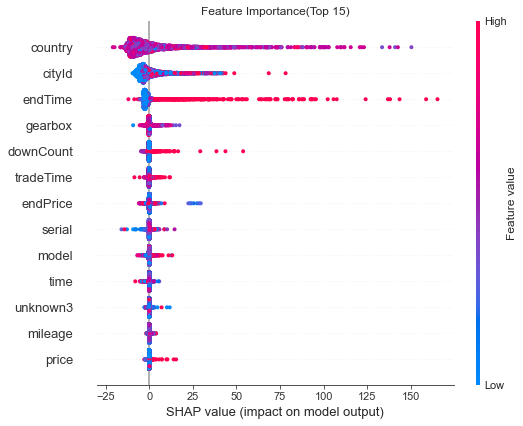

In [36]:
summary_plot(shap_values, X, max_display=15, show=False)
plt.title('Feature Importance(Top 15)')
plt.savefig('./solve2/summary.png', dpi=1600, bbox_inches = 'tight')

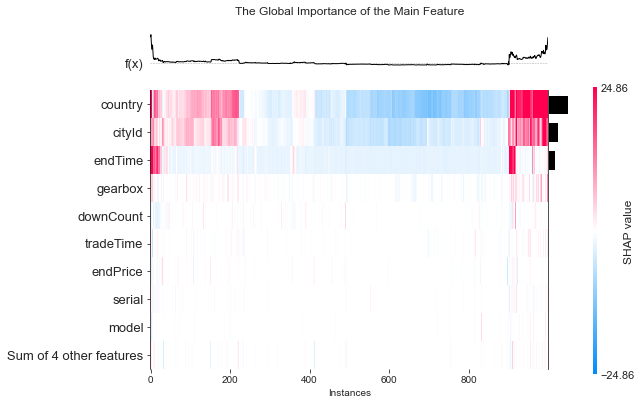

In [37]:
heat = exp(X[:1000])
heatmap(heat, show=False)
plt.title('The Global Importance of the Main Feature')
plt.savefig('./solve2/The global importance of the main feature.png', dpi=800)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

sc = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier()
)

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    sc
]

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

_ = temp[train_col]
X, y = SMOTE(random_state=42).fit_resample(_, temp['withdrawDate'])
# y = pd.concat([y, X], axis=1)

X

,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,314.000000,11903.000000,7.000000,11.800000,3.000000,118.000000,0.808219,1.000000,779414.000000,0.000000,3.980000,0,0.000000
1,797.000000,3174.000000,4.000000,3.870000,23.000000,632.000000,0.632877,2.000000,779413.000000,0.000000,4.500000,0,0.000000
2,196.000000,10320.000000,2.000000,1.640000,7.000000,981.000000,0.739726,3.000000,779412.000000,3.000000,23.000000,1,0.037657
3,845.000000,8504.000000,13.000000,10.450000,31.000000,1037.000000,1.331507,1.000000,779412.000000,0.000000,20.579800,0,0.000000
4,187.000000,9521.000000,8.000000,5.660000,11.000000,554.000000,0.616438,19.000000,779415.000000,32.000000,11.900000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15969,447.931095,2904.695142,8.683341,4.461331,7.738084,306.261916,0.952798,1.000000,779411.526192,0.000000,39.488061,0,0.000000
15970,61.423813,5907.772896,9.414521,12.390443,10.025750,356.000000,0.673010,4.512875,779412.000000,1.243562,10.596244,0,-0.008820
15971,221.784552,10440.521880,5.420506,5.933605,29.421660,167.680868,1.256853,3.683177,779412.473502,0.000000,16.306223,0,0.000000
15972,88.749966,8747.009994,7.849998,4.146502,1.460001,317.709944,0.743479,1.000000,779412.920002,20.789988,11.182011,0,0.061111


In [40]:
from category_encoders import LeaveOneOutEncoder

woe = LeaveOneOutEncoder(cols=classif, return_df=True)
woe.fit(X[classif], y)
X[classif] = woe.transform(X[classif], y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X

,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,0.928571,1.0,7.000000,11.800000,0.657050,118.000000,0.808219,0.595490,0.783172,0.000000,3.980000,0,0.000000
1,0.500000,0.5,4.000000,3.870000,0.696970,632.000000,0.632877,0.901554,0.762572,0.000000,4.500000,0,0.000000
2,0.666667,0.5,2.000000,1.640000,0.585106,981.000000,0.739726,0.805158,0.583722,3.000000,23.000000,1,0.037657
3,0.666667,0.5,13.000000,10.450000,0.652532,1037.000000,1.331507,0.595490,0.583722,0.000000,20.579800,0,0.000000
4,0.666667,0.5,8.000000,5.660000,0.699732,554.000000,0.616438,0.857765,0.685066,32.000000,11.900000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15969,0.500000,0.5,8.683341,4.461331,0.500000,306.261916,0.952798,0.595689,0.500000,0.000000,39.488061,0,0.000000
15970,0.500000,0.5,9.414521,12.390443,0.500000,356.000000,0.673010,0.500000,0.583925,1.243562,10.596244,0,-0.008820
15971,0.500000,0.5,5.420506,5.933605,0.500000,167.680868,1.256853,0.500000,0.500000,0.000000,16.306223,0,0.000000
15972,0.500000,0.5,7.849998,4.146502,0.500000,317.709944,0.743479,0.595689,0.500000,20.789988,11.182011,0,0.061111


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

acc = {}
result = {}

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score))
    model_name = str(model).split('(')[0]
    result[model_name] = score

    score = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))
    acc[model_name] = score
result = pd.DataFrame(result)
acc = pd.DataFrame(acc)
result

[10:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,StackingClassifier
0,0.818973,0.997773,0.989409,1.000000,0.999555,0.995984
1,0.766938,0.998214,0.988079,0.999554,0.999109,0.991964
2,0.785523,0.997771,0.989381,0.997331,0.999554,0.997324
3,0.818876,0.999107,0.992028,0.999109,1.000000,0.994199
4,0.832098,0.995977,0.990257,0.998217,0.998660,0.992844


In [42]:
acc

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,StackingClassifier
0,0.814037,0.997318,0.986142,1.000000,0.999553,0.995977
1,0.769231,0.998211,0.987030,0.999553,0.999106,0.991950
2,0.785331,0.997317,0.989714,0.997317,0.999553,0.997317
3,0.819767,0.997317,0.992844,0.999106,1.000000,0.994186
4,0.827818,0.996422,0.991055,0.998211,0.998658,0.992844


In [43]:
result.mean()

LogisticRegression            0.804482
DecisionTreeClassifier        0.997768
RandomForestClassifier        0.989831
GradientBoostingClassifier    0.998842
XGBClassifier                 0.999376
StackingClassifier            0.994463
dtype: float64

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve

n_estimator = 100

def RandomForestLR():
    rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
    rf_enc = OneHotEncoder()
    rf_lr = LogisticRegression()
    rf.fit(X_train, y_train)
    rf_enc.fit(rf.apply(X_train))
    rf_lr.fit(rf_enc.transform(rf.apply(X_train)), y_train)
    y_pred_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
    fpr_rf_lr, tpr_rf_lr, _ = roc_curve(y_test, y_pred_rf_lr)
    auc = roc_auc_score(y_test, y_pred_rf_lr)
    print("RF+LR:", auc)
    return fpr_rf_lr, tpr_rf_lr

def GdbtLR():
    grd = GradientBoostingClassifier(n_estimators=n_estimator)
    grd_enc = OneHotEncoder()
    grd_lr = LogisticRegression()
    grd.fit(X_train, y_train)
    grd_enc.fit(grd.apply(X_train)[:, :, 0])
    grd_lr.fit(grd_enc.transform(grd.apply(X_train)[:, :, 0]), y_train)
    y_pred_grd_lr = grd_lr.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
    fpr_grd_lr, tpr_grd_lr, _ = roc_curve(y_test, y_pred_grd_lr)
    auc = roc_auc_score(y_test, y_pred_grd_lr)
    print("GDBT+LR:", auc)
    return fpr_grd_lr, tpr_grd_lr

def Xgboost():
    xgboost = XGBClassifier(nthread=-1, learning_rate=0.1,
                            n_estimators=200, max_depth=5, gamma=0, subsample=0.9, colsample_bytree=0.5)
    xgboost.fit(X_train, y_train)
    y_xgboost_test = xgboost.predict_proba(X_test)[:, 1]
    fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_xgboost_test)
    auc = roc_auc_score(y_test, y_xgboost_test)
    print("Xgboost:", auc)
    return fpr_xgboost, tpr_xgboost

def Lr():
    lm = LogisticRegression(n_jobs=-1, C=0.1, penalty='l2')
    lm.fit(X_train, y_train)
    y_lr_test = lm.predict_proba(X_test)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_test)
    auc = roc_auc_score(y_test, y_lr_test)
    print("LR:", auc)
    return fpr_lr, tpr_lr

def XgboostLr():
    xgboost = XGBClassifier(nthread=-1, learning_rate=0.1,
                            n_estimators=200, max_depth=5, gamma=0, subsample=0.9, colsample_bytree=0.5)
    xgb_enc = OneHotEncoder()
    xgb_lr = LogisticRegression(n_jobs=-1, C=0.1, penalty='l2')
    xgboost.fit(X_train, y_train)

    xgb_enc.fit(xgboost.apply(X_train)[:, :])
    xgb_lr.fit(xgb_enc.transform(xgboost.apply(X_train)[:, :]), y_train)
    y_xgb_lr_test = xgb_lr.predict_proba(xgb_enc.transform(xgboost.apply(X_test)[:,:]))[:, 1]
    fpr_xgb_lr, tpr_xgb_lr, _ = roc_curve(y_test, y_xgb_lr_test)
    auc = roc_auc_score(y_test, y_xgb_lr_test)
    print("Xgboost + LR:", auc)
    return fpr_xgb_lr, tpr_xgb_lr

RF+LR: 0.993008149787253
GDBT+LR: 1.0
[10:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost: 1.0
LR: 0.8258267670467488
[10:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost + LR: 1.0


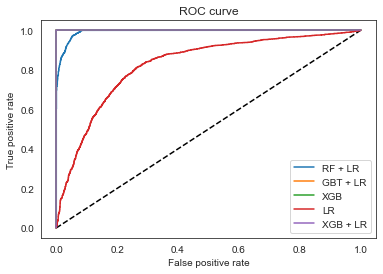

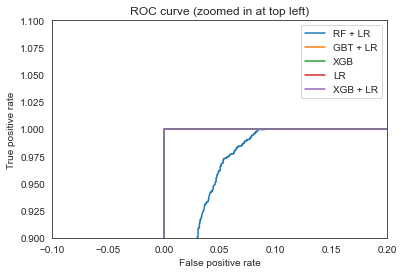

In [45]:
fpr_rf_lr, tpr_rf_lr = RandomForestLR()
fpr_grd_lr, tpr_grd_lr = GdbtLR()
fpr_xgboost, tpr_xgboost = Xgboost()
fpr_lr, tpr_lr = Lr()
fpr_xgb_lr, tpr_xgb_lr = XgboostLr()

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='RF + LR')
plt.plot(fpr_grd_lr, tpr_grd_lr, label='GBT + LR')
plt.plot(fpr_xgboost, tpr_xgboost, label='XGB')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_xgb_lr, tpr_xgb_lr, label='XGB + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('./solve2/ROC curve.png', dpi=800, bbox_inches = 'tight')
plt.show()

plt.figure(2)
plt.xlim(-0.1, 0.2)
plt.ylim(0.9, 1.1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='RF + LR')
plt.plot(fpr_grd_lr, tpr_grd_lr, label='GBT + LR')
plt.plot(fpr_xgboost, tpr_xgboost, label='XGB')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_xgb_lr, tpr_xgb_lr, label='XGB + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('./solve2/ROC curve(zoomed in at top left).png', dpi=800, bbox_inches = 'tight')

In [46]:
xgc = XGBClassifier(eta=.1, n_estimator=500, max_depth=5, tree_method='gpu_hist', gpu_id=0)
xgc.fit(X_train, y_train)
xgc.score(X_test, y_test)

[10:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9993740872105153

In [47]:
train = temp[train_col]
train[classif] = woe.fit_transform(train[classif], temp['withdrawDate'])
train

,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,0.928571,1.000000,7.0,11.80,0.798031,118.0,0.808219,0.775669,0.803987,0.0,3.9800,0,0.000000
1,0.799900,0.799900,4.0,3.87,0.760331,632.0,0.632877,0.915789,0.838936,0.0,4.5000,0,0.000000
2,0.666667,0.799900,2.0,1.64,0.670732,981.0,0.739726,0.837556,0.785578,3.0,23.0000,1,0.037657
3,0.666667,0.799900,13.0,10.45,0.756831,1037.0,1.331507,0.775669,0.785578,0.0,20.5798,0,0.000000
4,0.777778,0.799900,8.0,5.66,0.799387,554.0,0.616438,0.876855,0.814016,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.857143,1.000000,2.0,2.31,0.797235,160.0,0.419178,0.393258,0.814465,0.0,22.8800,0,0.000000
9996,0.796296,0.500000,6.0,6.50,0.800919,554.0,0.778082,0.881684,0.814465,0.0,12.3000,0,0.000000
9997,0.758621,0.647059,4.0,5.17,0.758197,356.0,0.975342,0.624434,0.785851,0.0,15.3800,0,0.000000
9998,0.800000,1.000000,4.0,2.29,0.836478,148.0,0.553425,0.775929,0.796386,10.0,36.6000,1,0.007592


In [48]:
X_ = X[y==0]
X_

,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
7987,0.756757,0.500000,4.000000,4.760000,0.701072,204.000000,0.424658,0.796196,0.685444,16.000000,17.980000,1,0.052687
7988,0.597403,0.666667,5.000000,5.040000,0.704545,848.000000,0.731507,0.595689,0.583925,2.000000,15.800000,2,-0.019355
7989,0.733333,0.500000,15.000000,7.230000,0.703008,208.000000,1.679452,0.796196,0.786408,0.000000,1.680000,0,0.000000
7990,1.000000,0.500000,14.000000,15.150000,0.811065,226.000000,1.065753,0.796196,0.685444,0.000000,1.680000,0,0.000000
7991,0.688889,1.000000,8.000000,5.630000,0.657374,208.000000,0.539726,0.595689,0.786408,0.000000,4.980000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15969,0.500000,0.500000,8.683341,4.461331,0.500000,306.261916,0.952798,0.595689,0.500000,0.000000,39.488061,0,0.000000
15970,0.500000,0.500000,9.414521,12.390443,0.500000,356.000000,0.673010,0.500000,0.583925,1.243562,10.596244,0,-0.008820
15971,0.500000,0.500000,5.420506,5.933605,0.500000,167.680868,1.256853,0.500000,0.500000,0.000000,16.306223,0,0.000000
15972,0.500000,0.500000,7.849998,4.146502,0.500000,317.709944,0.743479,0.595689,0.500000,20.789988,11.182011,0,0.061111


<IPython.core.display.Javascript object>

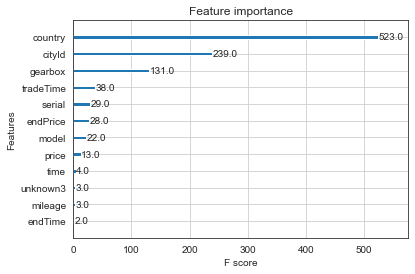

In [49]:
from pyforest import xgb

xgb.plot_importance(xgc)
plt.savefig('./solve2/Feature Importance Classification.png', dpi=800, bbox_inches = 'tight')

{1.0: 0.18340099,
 2.0: 0.21004458,
 3.0: 0.13774504,
 19.0: 0.20179604,
 9.0: 0.25431034,
 13.0: 0.14733401,
 17.0: 0.20179604,
 14.0: 0.16642238,
 7.0: 0.10296165,
 4.0: 0.25431034,
 15.0: 0.20179604,
 28.0: 0.16259478,
 12.0: 0.18340099,
 8.0: 0.010389134,
 11.0: 0.12211615,
 18.0: 0.18340099,
 51.0: 0.21004458,
 35.0: 0.18340099,
 5.0: 0.13774504,
 16.0: 0.12211615,
 32.0: 0.17343515,
 10.0: 0.25431034,
 27.0: 0.21004458,
 20.0: 0.25431034,
 45.0: 0.13774504,
 22.0: 0.12211615,
 21.0: 0.12211615,
 29.0: 0.18340099,
 23.0: 0.012586757,
 40.0: 0.21004458,
 48.0: 0.21004458,
 76.0: 0.010389134,
 68.0: 0.21004458,
 44.0: 0.21004458,
 25.0: 0.21004458,
 31.0: 0.18340099,
 69.0: 0.21004458,
 71.0: 0.21004458,
 41.0: 0.20179604,
 46.0: 0.21004458,
 6.0: 0.61314297,
 73.0: 0.16259478,
 64.0: 0.18340099,
 66.0: 0.16259478,
 47.0: 0.16259478,
 93.0: 0.16259478,
 55.0: 0.18340099,
 81.0: 0.16259478,
 38.0: 0.25431034,
 62.0: 0.12211615,
 43.0: 0.12211615,
 65.0: 0.16259478,
 30.0: 0.10296165,

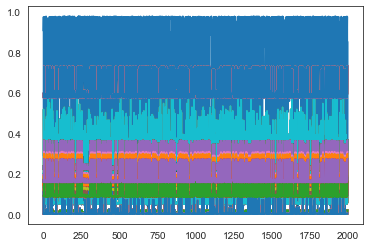

In [50]:
initial_class = initial.copy()
initial_class = initial_class[initial_class['withdrawDate'] == 0]
cityId = initial['cityId'].tolist()
proba = []
mean = {}
for city in cityId:
    initial_class['cityId'] = city
    initial_class[classif] = woe.transform(initial_class[classif])
    target = initial_class['withdrawDate']
    train_data = initial_class.drop(['carId', 'withdrawDate', 'pushDate'], axis=1)
    res = xgc.predict_proba(train_data)[:, 1]
    plt.plot(res, label='cityId: ' + str(int(city)))
    proba.append(res)
    mean[city] = res.mean()
mean

In [51]:
mean_df = pd.DataFrame(columns=['cityId', 'proba'])
mean_df['cityId'] = mean.keys()
mean_df['proba'] = mean.values()
mean_df

,cityId,proba
0,1.0,0.183401
1,2.0,0.210045
2,3.0,0.137745
3,19.0,0.201796
4,9.0,0.254310
...,...,...
74,33.0,0.210045
75,87.0,0.162595
76,39.0,0.334459
77,78.0,0.162595


In [52]:
mean_df.sort_values(by='proba', inplace=True, ascending=False)
mean_df

,cityId,proba
40,6.0,0.613143
76,39.0,0.334459
48,38.0,0.254310
21,10.0,0.254310
4,9.0,0.254310
...,...,...
71,80.0,0.010389
69,54.0,0.010389
13,8.0,0.010389
64,86.0,0.010389


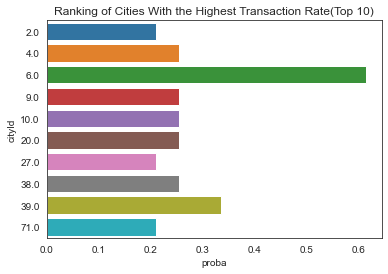

In [53]:
sns.barplot(x='proba', y='cityId', data=mean_df[: 10], orient='h')
plt.title('Ranking of Cities With the Highest Transaction Rate(Top 10)')
plt.savefig('./solve2/Ranking of Cities With the Highest Transaction Rate.png', dpi=800, bbox_inches = 'tight')

In [54]:
city_value = initial['cityId'].value_counts()
city_transaction = initial[initial['withdrawDate'] == 1]['cityId'].value_counts()
city_none_transaction = initial[initial['withdrawDate'] == 0]['cityId'].value_counts()

In [55]:
city_value = pd.DataFrame(city_value)
city_value['count'] = city_value['cityId']
city_value['cityId'] = city_value.index
city_value

,cityId,count
1.0,1.0,3848
17.0,17.0,880
19.0,19.0,675
3.0,3.0,672
7.0,7.0,664
...,...,...
60.0,60.0,1
73.0,73.0,1
47.0,47.0,1
53.0,53.0,1


In [56]:
city_transaction = pd.DataFrame(city_transaction)
city_none_transaction = pd.DataFrame(city_none_transaction)

city_transaction['transaction'] = city_transaction['cityId']
city_transaction['cityId'] = city_transaction.index

city_none_transaction['none_transaction'] = city_none_transaction['cityId']
city_none_transaction['cityId'] = city_none_transaction.index
city_transaction

,cityId,transaction
1.0,1.0,2985
17.0,17.0,775
19.0,19.0,592
14.0,14.0,572
3.0,3.0,563
...,...,...
37.0,37.0,1
80.0,80.0,1
47.0,47.0,1
93.0,93.0,1


In [57]:
city_none_transaction

,cityId,none_transaction
1.0,1.0,863
7.0,7.0,250
3.0,3.0,109
17.0,17.0,105
4.0,4.0,96
19.0,19.0,83
14.0,14.0,65
5.0,5.0,62
8.0,8.0,55
15.0,15.0,43


In [58]:
city = pd.merge(left=city_value, right=city_transaction, on=['cityId'], how='left')
city = pd.merge(left=city, right=city_none_transaction, on='cityId', how='left')
city

,cityId,count,transaction,none_transaction
0,1.0,3848,2985.0,863.0
1,17.0,880,775.0,105.0
2,19.0,675,592.0,83.0
3,3.0,672,563.0,109.0
4,7.0,664,414.0,250.0
...,...,...,...,...
74,60.0,1,NaN,1.0
75,73.0,1,1.0,NaN
76,47.0,1,1.0,NaN
77,53.0,1,1.0,NaN


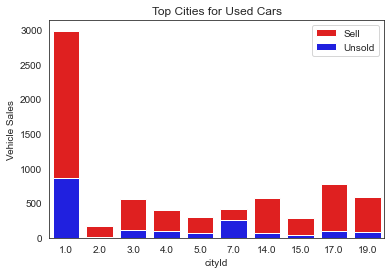

In [59]:
# city['cityId'] = city['cityId'].round(0).astype(str)
sns.barplot(x='cityId', y='transaction', data=city[: 10], color='red', label='Sell')
sns.barplot(x='cityId', y='none_transaction', data=city[: 10], color='blue', label='Unsold')
plt.ylabel('Vehicle Sales')
plt.title('Top Cities for Used Cars')
# plt.legend(handles=[bar1, bar2], labels=['Selled', 'unsold'])
plt.legend()
plt.savefig('./solve2/Top cities for used cars.png', dpi=800, bbox_inches = 'tight')

In [60]:
regress = initial.copy()
regress[classif] = le.transform(regress[classif])
regress

,carId,pushDate,withdrawDate,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
0,68603,0.0,1,12.733333,16.000000,7.0,11.80,22.739473,118.0,0.808219,15.527027,16.887417,0.0,3.9800,0,0.000000
1,12312,31.0,1,22.186780,22.186780,4.0,3.87,17.106557,632.0,0.632877,30.052356,21.473758,0.0,4.5000,0,0.000000
2,57655,26.0,1,24.750000,22.186780,2.0,1.64,22.020243,981.0,0.739726,26.610119,22.545330,3.0,23.0000,1,0.037657
3,45688,3.0,1,19.714286,22.186780,13.0,10.45,24.860846,1037.0,1.331507,15.527027,22.545330,0.0,20.5798,0,0.000000
4,52081,53.0,1,22.454545,22.186780,8.0,5.66,23.506116,554.0,0.616438,16.164444,22.795689,32.0,11.9000,1,0.030945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,42.0,0,11.500000,21.500000,2.0,2.31,22.673112,160.0,0.419178,38.366667,22.795689,0.0,22.8800,0,0.000000
9996,54312,25.0,0,22.454545,12.333333,6.0,6.50,23.506116,554.0,0.778082,16.954545,22.795689,0.0,12.3000,0,0.000000
9997,45597,18.0,0,20.329545,38.000000,4.0,5.17,24.860846,356.0,0.975342,27.313253,22.545330,0.0,15.3800,0,0.000000
9998,38629,15.0,0,39.709677,16.666667,4.0,2.29,19.636364,148.0,0.553425,15.527027,21.639583,10.0,36.6000,1,0.007592


In [61]:
regress = regress.drop('carId', axis=1)
regress = regress[regress['withdrawDate'] == 1]
regress = regress[regress['pushDate'] != 0]
push = regress['pushDate']
re_train = regress[train_col]
re_train

,serial,model,time,mileage,gearbox,unknown3,tradeTime,cityId,country,endTime,endPrice,downCount,price
1,22.186780,22.18678,4.0,3.87,17.106557,632.0,0.632877,30.052356,21.473758,0.0,4.5000,0,0.000000
2,24.750000,22.18678,2.0,1.64,22.020243,981.0,0.739726,26.610119,22.545330,3.0,23.0000,1,0.037657
3,19.714286,22.18678,13.0,10.45,24.860846,1037.0,1.331507,15.527027,22.545330,0.0,20.5798,0,0.000000
4,22.454545,22.18678,8.0,5.66,23.506116,554.0,0.616438,16.164444,22.795689,32.0,11.9000,1,0.030945
5,21.533333,30.00000,7.0,5.18,22.739473,356.0,0.958904,24.098901,24.146341,5.0,16.8799,3,0.087573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,23.700000,31.25000,5.0,6.22,23.506116,57.0,0.553425,30.052356,22.795689,0.0,11.0000,1,0.033392
7996,15.696970,123.00000,4.0,2.66,19.536585,2.0,1.715068,116.200000,22.795689,216.0,9.3800,1,0.030992
7997,21.481481,6.00000,8.0,8.09,20.664841,356.0,1.389041,16.164444,22.545330,8.0,3.8000,1,0.050000
7998,15.750000,22.18678,6.0,10.52,21.903727,332.0,1.227397,16.222920,21.473758,0.0,4.8800,0,0.000000


In [62]:
push

1        31.0
2        26.0
3         3.0
4        53.0
5        49.0
        ...  
7995     13.0
7996    218.0
7997     10.0
7998      4.0
7999      1.0
Name: pushDate, Length: 7737, dtype: float64

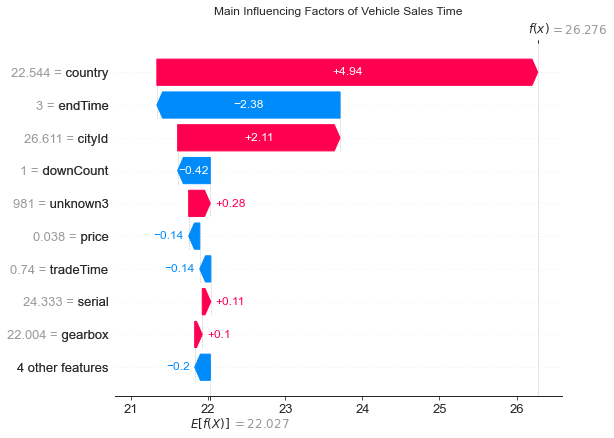

In [68]:
waterfall_plot(shap_values2[1], show=False)
plt.title('Main Influencing Factors of Vehicle Sales Time')
plt.savefig('./solve2/Main influencing factors of vehicle sales time.png', dpi=800, bbox_inches = 'tight')